<a href="https://colab.research.google.com/github/Raruu/Machine-Learning-2025/blob/main/JS04-Quiz1/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identitas
- Hidayat Widi Saputra
- 2341720157
- TI-3G

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [253]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [254]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [255]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [256]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [257]:
# Data Size
df.shape

(48842, 15)

In [258]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [259]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [260]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [261]:
# 2. Variabel apa yang memiliki nilai yang hilang (missing value) dan berapa jumlahnya?

df.isnull().sum()[df.isnull().sum() > 0]

,0
workclass,963
occupation,966
native-country,274


variabel yang nilainya hilang: workclass, occupation, native-country

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [262]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# 1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

# 2. Cek kembali apakah masih terdapat data yang hilang
df.isnull().sum()

/tmp/ipython-input-1450812220.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
/tmp/ipython-input-1450812220.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [263]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df_kualitatif = df.select_dtypes(include=['object']).columns
print(f"Kolom kualitatif: {df_kualitatif.tolist()}")

print("\nUniq setiap kolom")
for col in df_kualitatif:
    print(f"\nKolom: {col}")
    print(df[col].unique())

Kolom kualitatif: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

Uniq setiap kolom

Kolom: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kolom: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kolom: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kolom: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Kolom: relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Kolom: race
['White' '

"?" muncul di:
- workclass
- occupation
- native-country

ada yang mirip:
- Di `income`: <=50K dan <=50K
- Di `income`: >50K dan >50K.

In [264]:
# Penyesuaian

# Replace yang mirip
for col in df_kualitatif:
    if col == "income":
        df[col] = df[col].replace({
            "<=50K.": "<=50K",
            ">50K.": ">50K"
        })

# Ganti others
df.replace('?', 'Others', inplace=True)

print("Setelah penyesuaian")
for col in df_kualitatif:
    print(f"\nKolom: {col}")
    print(df[col].unique())

Setelah penyesuaian

Kolom: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kolom: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kolom: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kolom: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Kolom: relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Kolom: race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Kolom: sex
['Male' 'Female']

Kolom: native-country
['United-State

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

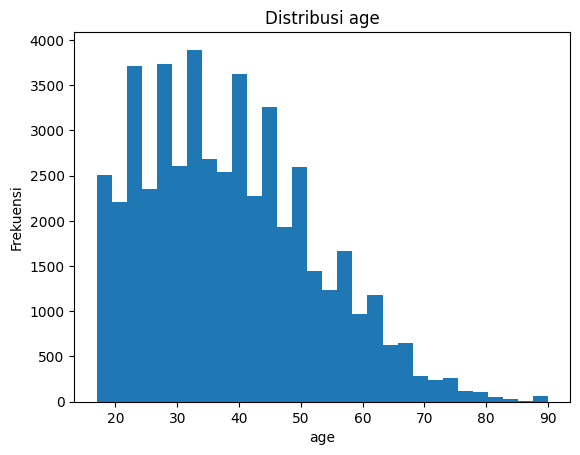

In [265]:
# Jawab 1.1 - Histrogram

plt.figure()
plt.hist(df['age'], bins=30)
plt.title(f'Distribusi age')
plt.xlabel('age')
plt.ylabel('Frekuensi')
plt.show()

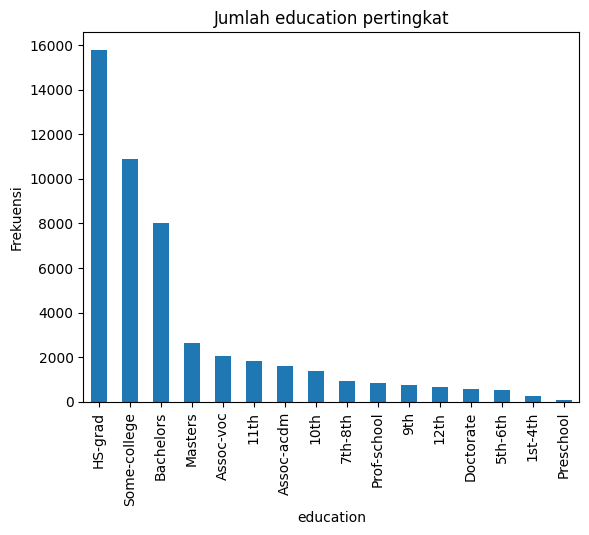

In [266]:
# Jawab 1.2 - Barchart

plt.figure()
df['education'].value_counts().plot(kind='bar')
plt.title('Jumlah education pertingkat')
plt.xlabel('education')
plt.ylabel('Frekuensi')
plt.show()

Text(0.5, 1.0, 'Income berdasarkan hours-per-week')

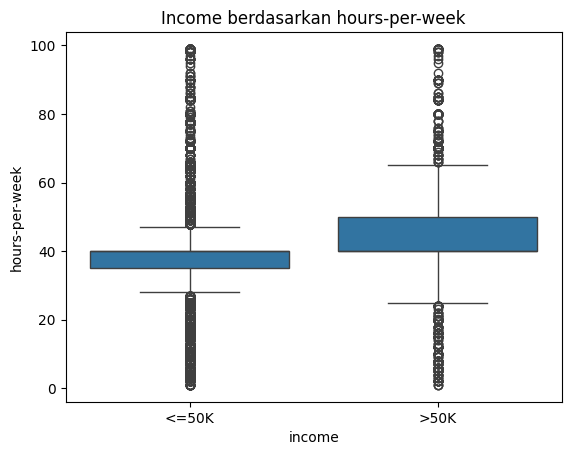

In [267]:
# Jawab 1.3 - Boxplot

plt.figure()
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Income berdasarkan hours-per-week')

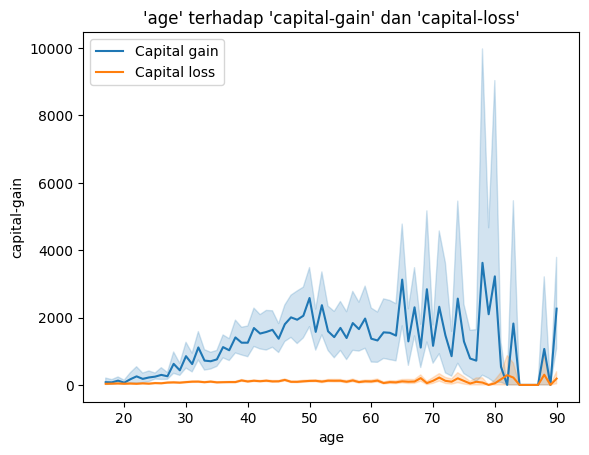

In [268]:
# Jawab 1.4 - Lineplot

plt.figure()
sns.lineplot(x='age', y='capital-gain', data=df, label='Capital gain')
sns.lineplot(x='age', y='capital-loss', data=df, label='Capital loss')
plt.title("'age' terhadap 'capital-gain' dan 'capital-loss'")
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [269]:
# Jawab dengan komentar python

'''
  Bisa dengan multiple comment
  seperti ini
'''

'''
1. Distribusi umur terlihat right-skewed (condong ke kanan), yaitu lebih banyak individu pada usia muda, dan semakin sedikit pada usia tua. Puncak frekuensi ada di sekitar 30–40 tahun.
2. Saya akan mengimputasi data dengan metode median karena median adalah nilai tengah yang lebih representatif digunakan pada distribusi yang terlihat right-skewed
3. Jumlah outlier terbanyak ada di kategori <=50K, karena dari plotting terlihat outlinernya lebih padat serta memiliki jumlah sebanyak 10775 sedangkan pada >50K hanya 2721
'''

# Menghitung outliner 'income' berkaitan dengan 'hour-per-week'
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_outliner = df.copy()
df_outliner['is_outlier'] = (df_outliner['hours-per-week'] < lower_bound) | (df_outliner['hours-per-week'] > upper_bound)

outlier_count = df_outliner.groupby('income')['is_outlier'].sum()
print(f"Jumlah Outliner: {outlier_count}")

Jumlah Outliner: income
<=50K    10775
>50K      2721
Name: is_outlier, dtype: int64


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [270]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

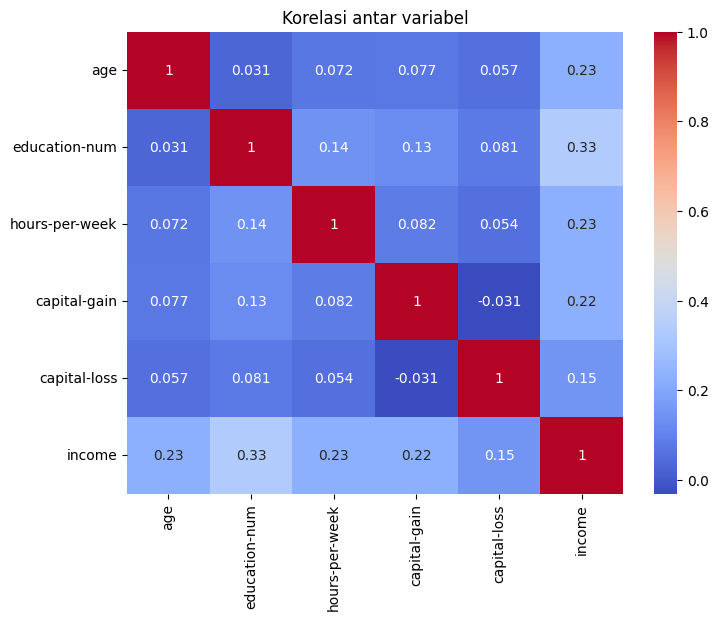

In [271]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

corr_matrix = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasi antar variabel")
plt.show()


In [272]:
# Hasil analisis jelaskan pada cell ini
'''
- Yang memiliki korelasi paling kuat adalah income dengan education-num
- Korelasi yang paling lemah adalah capital-gain dan capital-loss
- Tidak ada korelasi yang terlalu tinggi antar variabel
'''

'\n- Yang memiliki korelasi paling kuat adalah income dengan education-num\n- Korelasi yang paling lemah adalah capital-gain dan capital-loss\n- Tidak ada korelasi yang terlalu tinggi antar variabel\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [273]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


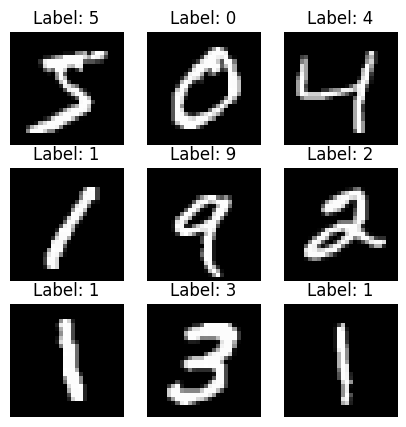

In [274]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

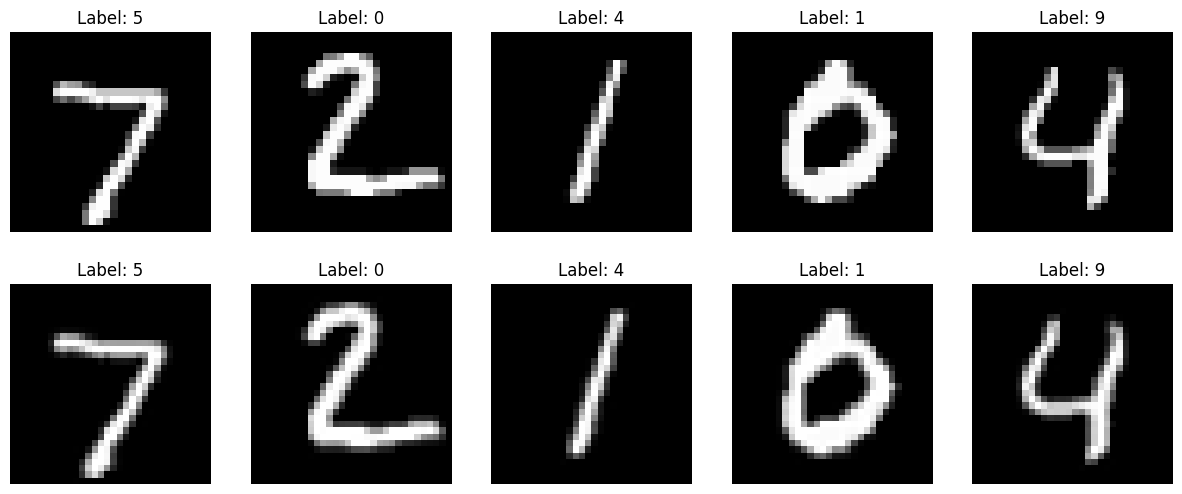

In [275]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2
upsampled = np.zeros((X_test.shape[0], 32, 32), X_test.dtype)

for i in range(len(X_test)):
    upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Original")
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

    plt.subplot(2,5,i+6)
    plt.title("Upsampled")
    plt.imshow(upsampled[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Range
Original: 0 - 255
Normalized: 0.0 - 1.0


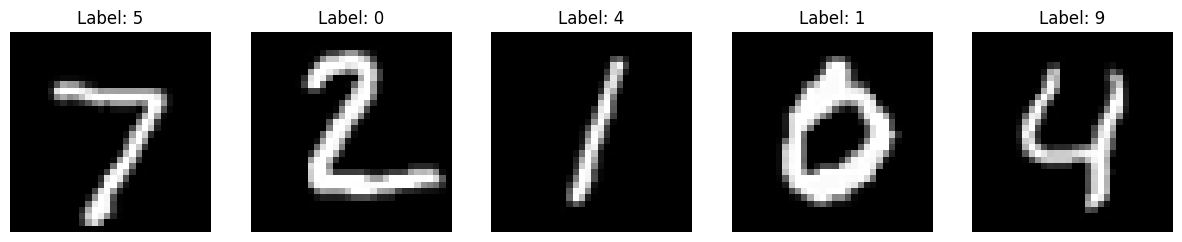

In [276]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

normalized = upsampled / 255.0

print("Range")
print(f"Original: {upsampled.min()} - {upsampled.max()}")
print(f"Normalized: {normalized.min()} - {normalized.max()}")

plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Upsampled normalized")
    plt.imshow(normalized[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

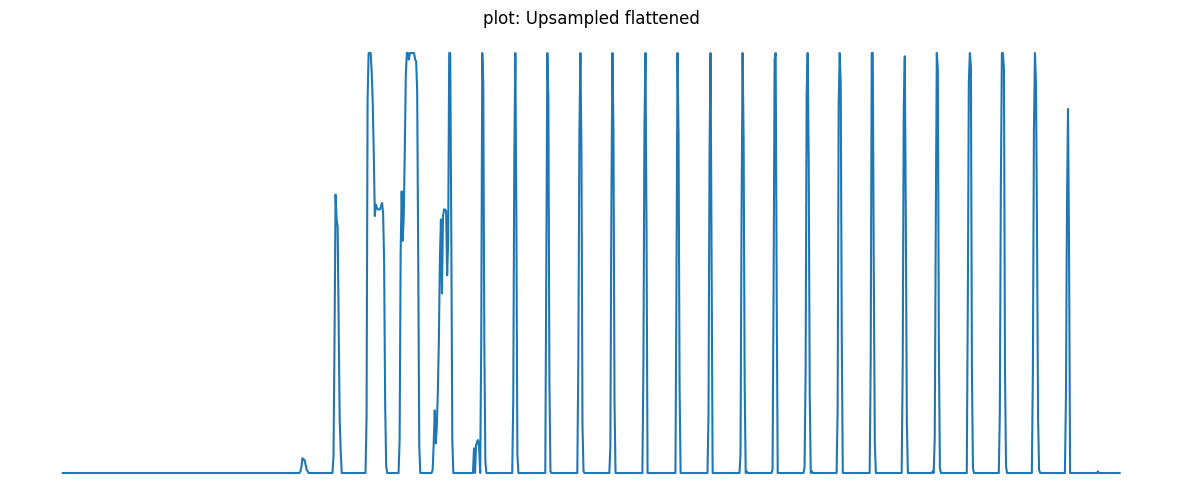

In [277]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

normalized_flat = normalized.reshape(normalized.shape[0], -1)

plt.figure(figsize=(15,6))
plt.title("plot: Upsampled flattened")
plt.plot(normalized_flat[0])
plt.axis("off")

plt.show()

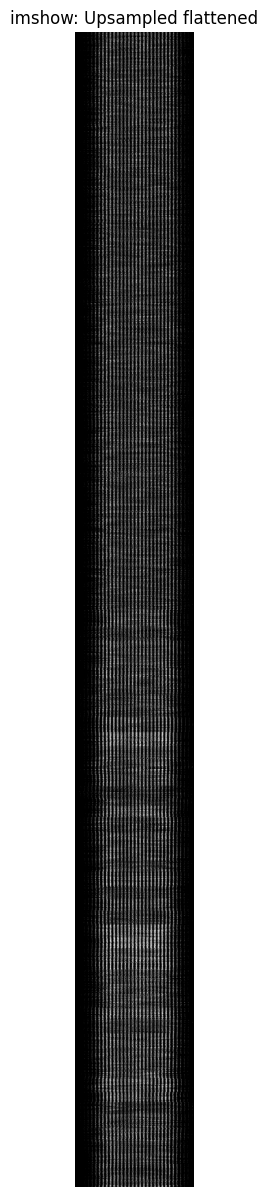

In [278]:
plt.figure(figsize=(6,15))

plt.title("imshow: Upsampled flattened")
plt.imshow(normalized_flat, cmap="gray")
plt.axis("off")

plt.show()